# Matplotlib Practice

In [61]:
 # Import pandas as pd
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [4]:
# Import the 'data/car-sales.csv' into a DataFame called car_sales and view
car_sales = pd.read_csv("data/car-sales.csv")

car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [5]:
# Try to plot the 'Price' column using the plot() function
car_sales["Price"].plot()

TypeError: no numeric data to plot

Why doesn't it work?

Hint: It's not numeric data.

In the process of turning it to numeric data, let's create another column which adds the total amount of sales and another one which shows what date the car was sold.

Hint: To add a column up cumulatively, look up the cumsum() function. And to create a column of dates, look up the date_range() function.

In [8]:
# Remove the symbols, the final two numbers from the 'Price' column and convert it to numbers

car_sales["Price"] = car_sales["Price"].str.replace('[\$,]', '', regex=True).astype(float)
car_sales.head()


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Basmala\AppData\Local\Temp\ipykernel_5344\2264771512.py:3: SyntaxWarning: invalid escape sequence '\$'
  car_sales["Price"] = car_sales["Price"].str.replace('[\$,]', '', regex=True).astype(float)


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0


In [18]:

# Add a column called 'Total Sales' to car_sales which cumulatively adds the 'Price' column
car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Add a column called 'Sale Date' which lists a series of successive dates starting from today (your today)
car_sales["Sale Date"] = pd.date_range(start=pd.Timestamp.today(), periods=len(car_sales), freq='D')

# View the car_sales DataFrame
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Total Sales,Sale Date
0,Toyota,White,150043,4,4000.0,4000.0,2025-03-13 16:29:10.195106
1,Honda,Red,87899,4,5000.0,9000.0,2025-03-14 16:29:10.195106
2,Toyota,Blue,32549,3,7000.0,16000.0,2025-03-15 16:29:10.195106
3,BMW,Black,11179,5,22000.0,38000.0,2025-03-16 16:29:10.195106
4,Nissan,White,213095,4,3500.0,41500.0,2025-03-17 16:29:10.195106


Now we've got a numeric column (`Total Sales`) and a dates column (`Sale Date`), let's visualize them.

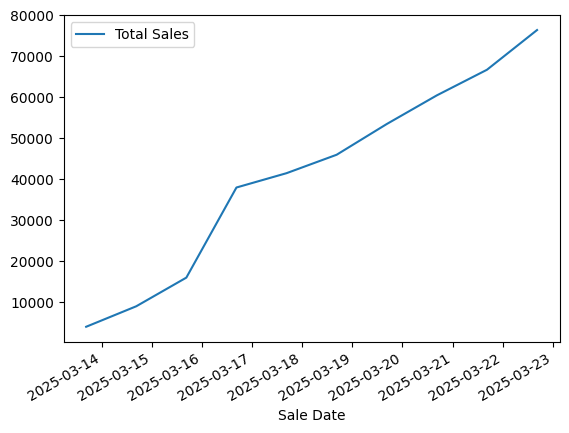

In [ ]:
# Use the plot() function to plot the 'Sale Date' column versus the 'Total Sales' column
car_sales.plot(x="Sale Date", y="Total Sales", kind="line")

plt.show()

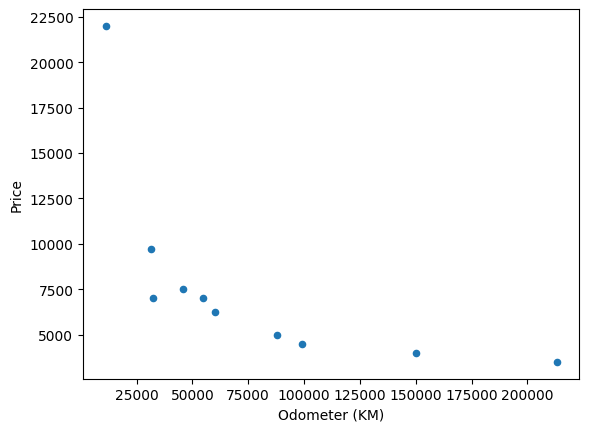

In [ ]:
# Convert the 'Price' column to the integers
if car_sales["Price"].dtype == "object":
    car_sales["Price"] = car_sales["Price"].str.replace(r"[^\d]", "", regex=True).astype(int)

# Create a scatter plot of the 'Odometer (KM)' and 'Price' column using the plot() function
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")
plt.show()

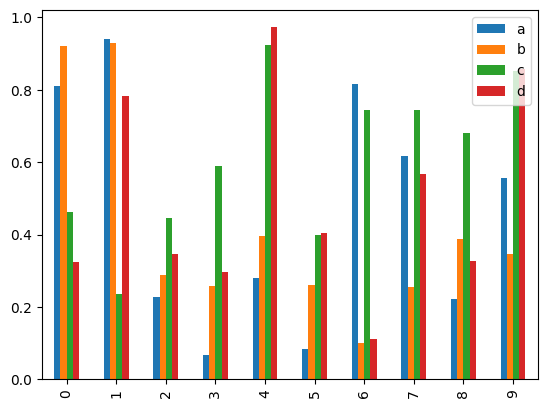

In [31]:
# Create a NumPy array of random numbers of size (10, 4) and save it to X
X = np.random.rand(10, 4)

# Turn the NumPy array X into a DataFrame with columns called ['a', 'b', 'c', 'd']
df = pd.DataFrame(X, columns=['a', 'b', 'c', 'd'])

# Create a bar graph of the DataFrame
df.plot(kind = "bar")
plt.show()

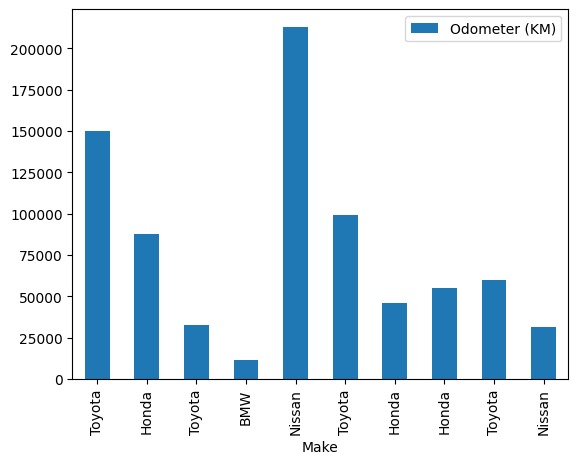

In [33]:
# Create a bar graph of the 'Make' and 'Odometer (KM)' columns in the car_sales DataFrame
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")
plt.show()


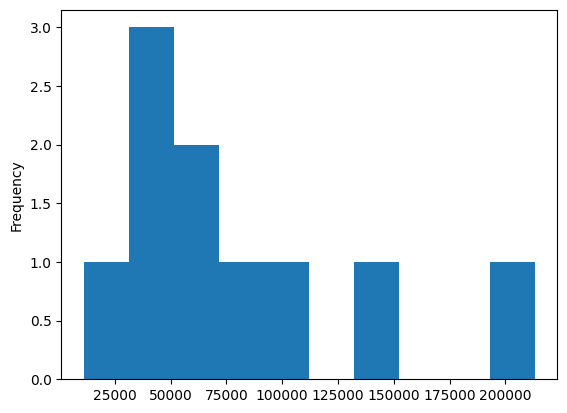

In [34]:
# Create a histogram of the 'Odometer (KM)' column
car_sales["Odometer (KM)"].plot(kind="hist")
plt.show()

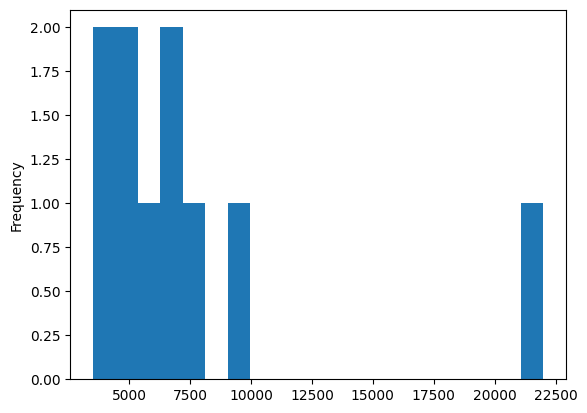

In [35]:
# Create a histogram of the 'Price' column with 20 bins
car_sales["Price"].plot(kind="hist",bins=20)
plt.show()

Now we've seen a few examples of plotting directly from DataFrames using the `car_sales` dataset.

Let's try using a different dataset.

In [38]:
# Import "data/heart-disease.csv" and save it to the variable "heart_disease"
heart_disease = pd.read_csv("data/heart-disease.csv")

In [37]:
# View the first 10 rows of the heart_disease DataFrame

heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


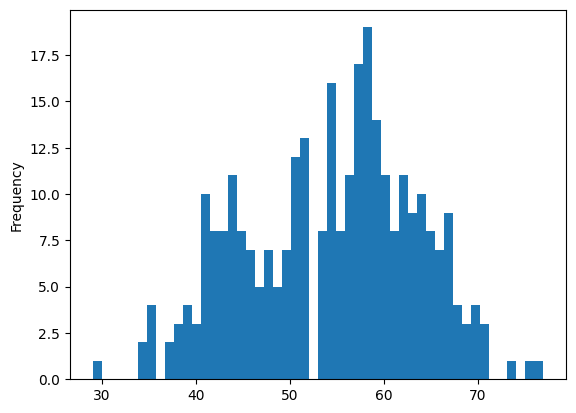

In [39]:
# Create a histogram of the "age" column with 50 bins
heart_disease["age"].plot(kind="hist",bins=50)
plt.show()

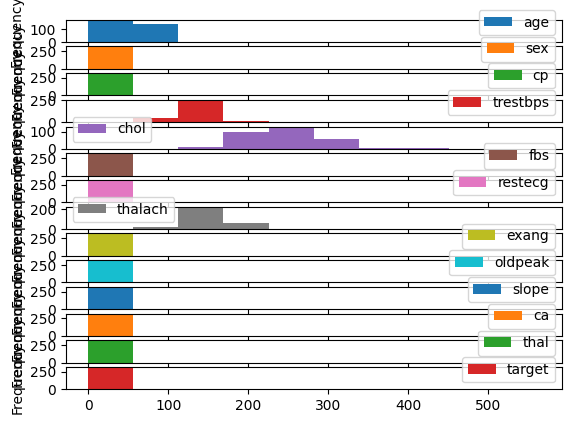

In [44]:
# Call plot.hist() on the heart_disease DataFrame and toggle the
# "subplots" parameter to True
heart_disease.plot.hist(subplots=True)
plt.show()

That plot looks pretty squished. Let's change the figsize.

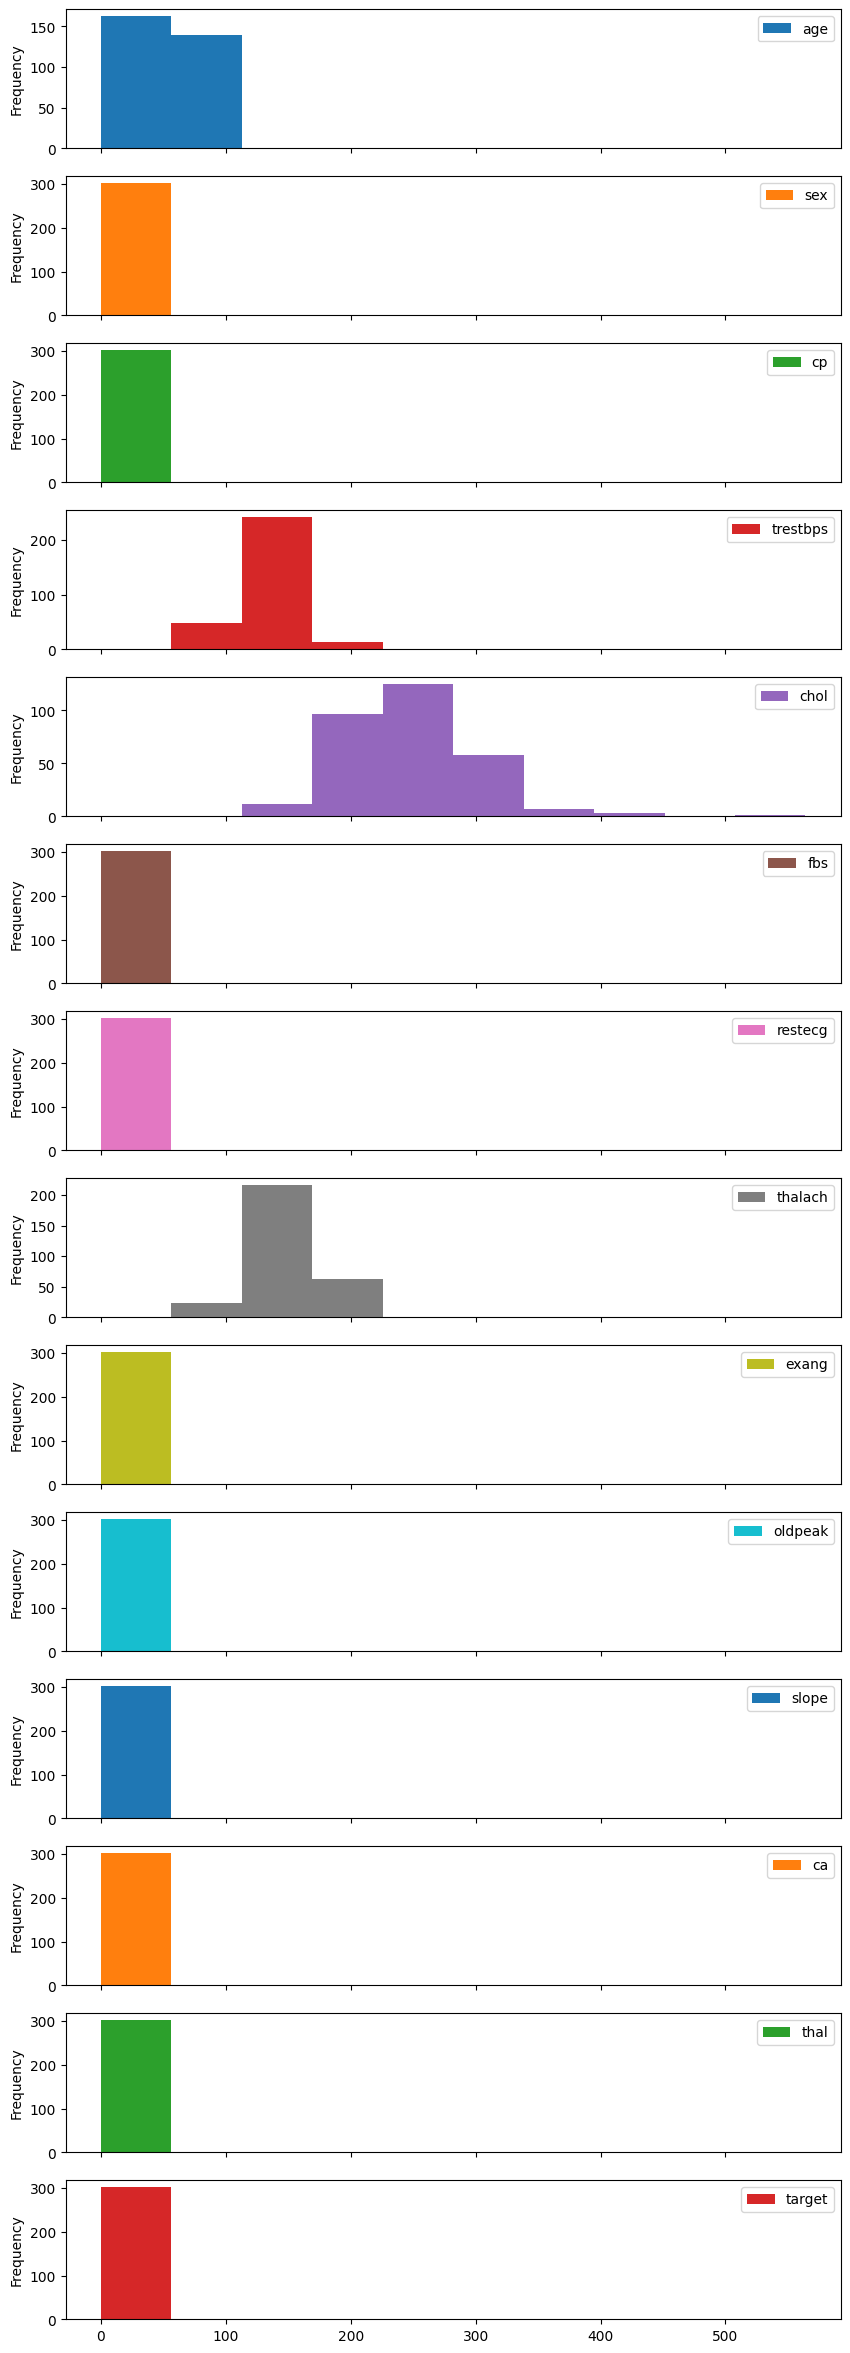

In [45]:
# Call the same line of code from above except change the "figsize" parameter
# to be (10, 30)
heart_disease.plot.hist(subplots=True, figsize=(10, 30) )
plt.show()

Now let's try comparing two variables versus the target variable.

More specifially we'll see how age and cholesterol combined effect the target in **patients over 50 years old**.

For this next challenge, we're going to be replicating the following plot:

<img src="images/matplotlib-heart-disease-chol-age-plot.png"/>

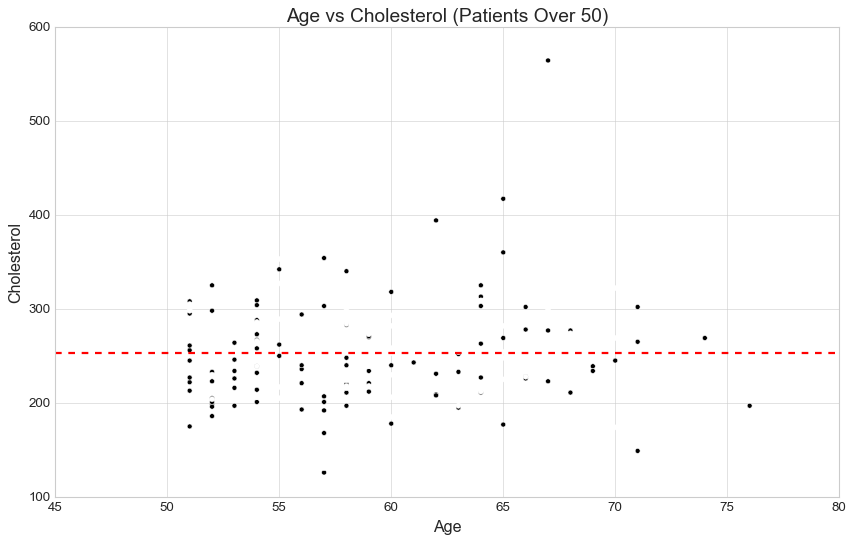

In [71]:
# Replicate the above plot in whichever way you see fit

# Note: The method below is only one way of doing it, yours might be
# slightly different

# Create DataFrame with patients over 50 years old
over_50 = heart_disease[heart_disease["age"] > 50]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], over_50["chol"], c=over_50["target"])

# Plot the data
ax.set(title="Age vs Cholesterol (Patients Over 50)",
       xlabel="Age",
       ylabel="Cholesterol")

# Customize the plot
ax.axhline(over_50["chol"].mean(), linestyle="--", color="red")

# Add a meanline
plt.show()

Beatiful, now you've created a plot of two different variables, let's change the style.

In [48]:
# Check what styles are available under plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


C:\Users\Basmala\AppData\Local\Temp\ipykernel_5344\582959962.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


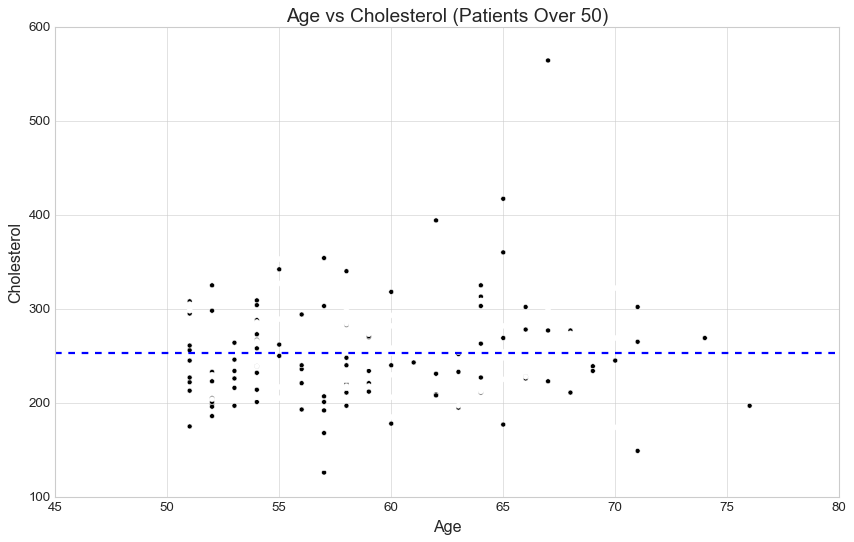

In [ ]:
# Change the style to use "seaborn-whitegrid"

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], over_50["chol"], c=over_50["target"])


ax.set(title="Age vs Cholesterol (Patients Over 50)",
       xlabel="Age",
       ylabel="Cholesterol")

ax.axhline(over_50["chol"].mean(), linestyle="--", color="blue")

plt.show()


Now the style has been changed, we'll replot the same figure from above and see what it looks like.

If you've changed the style correctly, it should look like the following:
<img src="images/matplotlib-heart-disease-chol-age-plot-seaborn-whitegrid.png"/>


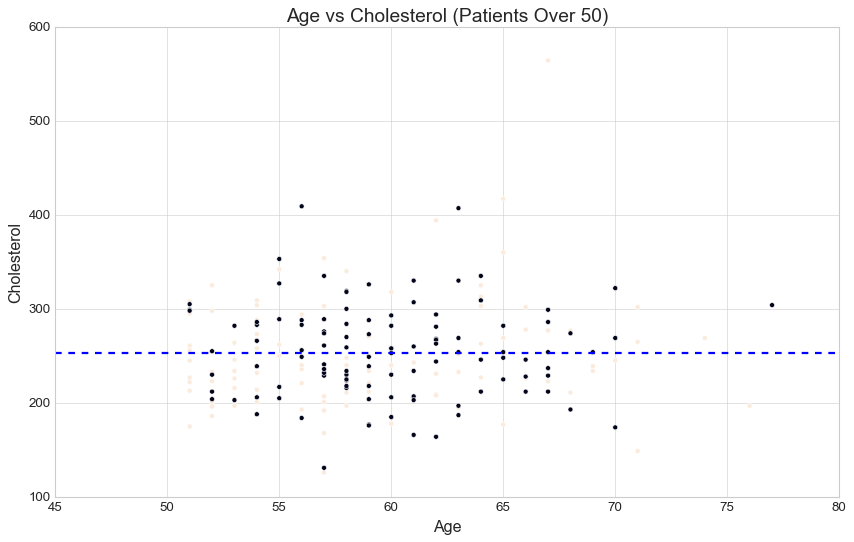

In [67]:
# Reproduce the same figure as above with the "seaborn-whitegrid" style
sns.set_style("whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], over_50["chol"], c=over_50["target"])


# Plot the data
ax.set(title="Age vs Cholesterol (Patients Over 50)",
       xlabel="Age",
       ylabel="Cholesterol")


# Customize the plot
ax.axhline(over_50["chol"].mean(), linestyle="--", color="blue")

# Add a meanline
plt.show()

Wonderful, you've changed the style of the plots and the figure is looking different but the dots aren't a very good colour.

Let's change the `cmap` parameter of `scatter()` as well as the `color` parameter of `axhline()` to fix it.

Completing this step correctly should result in a figure which looks like this:
<img src="images/matplotlib-heart-disease-chol-age-plot-cmap-change.png"/>

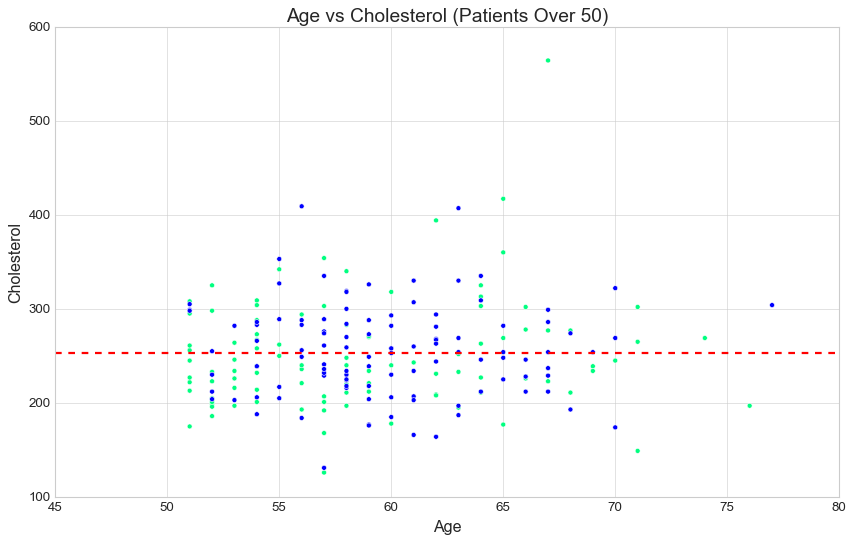

In [83]:
# Replot the same figure as above except change the "cmap" parameter
# of scatter() to "winter"
# Also change the "color" parameter of axhline() to "red"
sns.set_style("whitegrid")
# Create the plot
ig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], over_50["chol"], c=over_50["target"], cmap="winter")

# Plot the data
ax.set(title="Age vs Cholesterol (Patients Over 50)",
       xlabel="Age",
       ylabel="Cholesterol")

# Customize the plot
ax.axhline(over_50["chol"].mean(), linestyle="--", color="red")

# Add a meanline
# plt.show()

Beautiful! Now our figure has an upgraded color scheme let's save it to file.

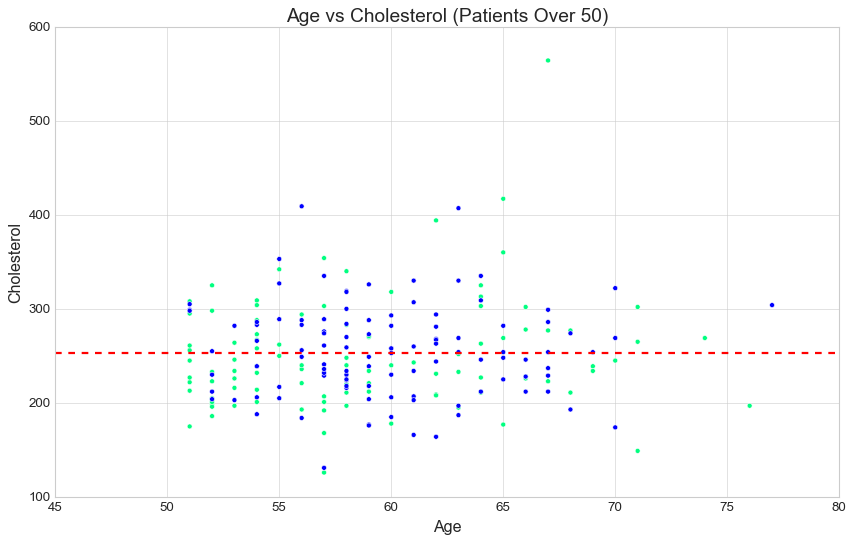

In [87]:
# Save the current figure using savefig(), the file name can be anything you want


sns.set_style("whitegrid")


fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], over_50["chol"], c=over_50["target"], cmap="winter")

ax.set(title="Age vs Cholesterol (Patients Over 50)",
       xlabel="Age",
       ylabel="Cholesterol")

ax.axhline(over_50["chol"].mean(), linestyle="--", color="red")

plt.savefig("heart_disease.png", dpi=300, bbox_inches="tight") 

plt.show()



(<Figure size 160x160 with 1 Axes>, <Axes: >)

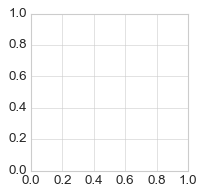

In [80]:
# Reset the figure by calling plt.subplots()

plt.subplots()
